In [1]:
from datasets import load_dataset,Dataset
from datasets.features import Features,Value
import pandas as pd
from datetime import datetime
from tqdm import tqdm
import seaborn as sns
import matplotlib.pylab as plt
import os
from datasets.utils import disable_progress_bar
from bertopic import BERTopic
import numpy as np
from IPython.display import Image

### Data

In [3]:
df = load_dataset("rjac/all-the-news-2-1-Component-one")

Using custom data configuration rjac--all-the-news-2-1-Component-one-7609e9ec7b9659ad
Reusing dataset parquet (/home/rjac/.cache/huggingface/datasets/rjac___parquet/rjac--all-the-news-2-1-Component-one-7609e9ec7b9659ad/0.0.0/7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8)


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df

DatasetDict({
    train: Dataset({
        features: ['idx', 'article_idx', 'date', 'year', 'month', 'day', 'author', 'title', 'article', 'url', 'section', 'publication'],
        num_rows: 2688878
    })
})

In [5]:
df = df.filter(lambda batch: batch["article"] is not None)

Loading cached processed dataset at /home/rjac/.cache/huggingface/datasets/rjac___parquet/rjac--all-the-news-2-1-Component-one-7609e9ec7b9659ad/0.0.0/7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8/cache-9b93078d8e5b1e6f.arrow


In [6]:
df_batch = df.shuffle(7614)["train"].select(range(100_000))

Loading cached shuffled indices for dataset at /home/rjac/.cache/huggingface/datasets/rjac___parquet/rjac--all-the-news-2-1-Component-one-7609e9ec7b9659ad/0.0.0/7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8/cache-3fd581d79b54f9d8.arrow


In [7]:
batch = df_batch["article"]

In [8]:
len(batch)

100000

In [9]:
topic_model = BERTopic(verbose=True)

In [10]:
topics,probs = topic_model.fit_transform(batch)

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

2022-06-22 11:13:04,403 - BERTopic - Transformed documents to Embeddings
2022-06-22 11:15:01,043 - BERTopic - Reduced dimensionality


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2022-06-22 11:15:12,890 - BERTopic - Clustered reduced embeddings


In [11]:
topic_model.save("BertTopic100k")

/home/rjac/anaconda3/envs/hf/lib/python3.10/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [2]:
topic_model = BERTopic.load("BertTopic100k")

In [2]:
#topic_model.visualize_hierarchy()

### Words Example of Topic

In [5]:
topic_model.get_topic(1)

[('art', 0.010257557124099592),
 ('museum', 0.006403516724406673),
 ('artists', 0.005225135454976999),
 ('exhibition', 0.004730453345948618),
 ('artist', 0.0047167245225543655),
 ('paintings', 0.0041207264009583775),
 ('painting', 0.003962708031494659),
 ('gallery', 0.00380028635566554),
 ('works', 0.002787917126408898),
 ('museums', 0.0027095525742413897)]

In [6]:
topic_model.get_topic(2)

[('drug', 0.01558780280999502),
 ('patients', 0.010155664909554794),
 ('drugs', 0.009263848712481699),
 ('generic', 0.00723904881477171),
 ('fda', 0.0071366929003131244),
 ('medicines', 0.005707337558383131),
 ('insulin', 0.005704000998231594),
 ('treatment', 0.005678616859379546),
 ('cancer', 0.005616652147160259),
 ('clinical', 0.005235552404576155)]

### Most Frequent

In [25]:
topic_model.get_topic_info().head(50)

,Topic,Count,Name
0,-1,40008,-1_and_to_of_that
1,0,1039,0_police_officers_shooting_officer
2,1,868,1_art_museum_artists_exhibition
3,2,838,2_drug_patients_drugs_generic
4,3,768,3_innings_inning_runs_yankees
5,4,752,4_coronavirus_virus_outbreak_cases
6,5,735,5_brexit_eu_britain_parliament
7,6,606,6_obamacare_care_health_insurance
8,7,581,7_points_nba_rebounds_warriors
9,8,525,8_korea_north_korean_kim


### Less Frequent

In [10]:
topic_model.get_topic_info().tail(50)

,Topic,Count,Name
1051,1072,11,1072_h1_yuan_fy_net
1068,1050,11,1050_ltd_headline_co_beijing
1055,1079,11,1079_guess_munck_dapper_noah
1067,1069,11,1069_monzo_revolut_banks_blomfield
1044,1074,11,1074_bangladesh_dhaka_islamic_bangladeshi
1045,1078,11,1078_pis_polands_warsaw_biedron
1046,1077,11,1077_campus_speech_campuses_berkeley
1047,1076,11,1076_gas_delek_leviathan_israels
1048,1075,11,1075_italys_ciampi_salvini_5star
1050,1073,11,1073_tiffany_lvmh_lvmhs_luxury


In [9]:
tp = topic_model.visualize_barchart(top_n_topics=12)

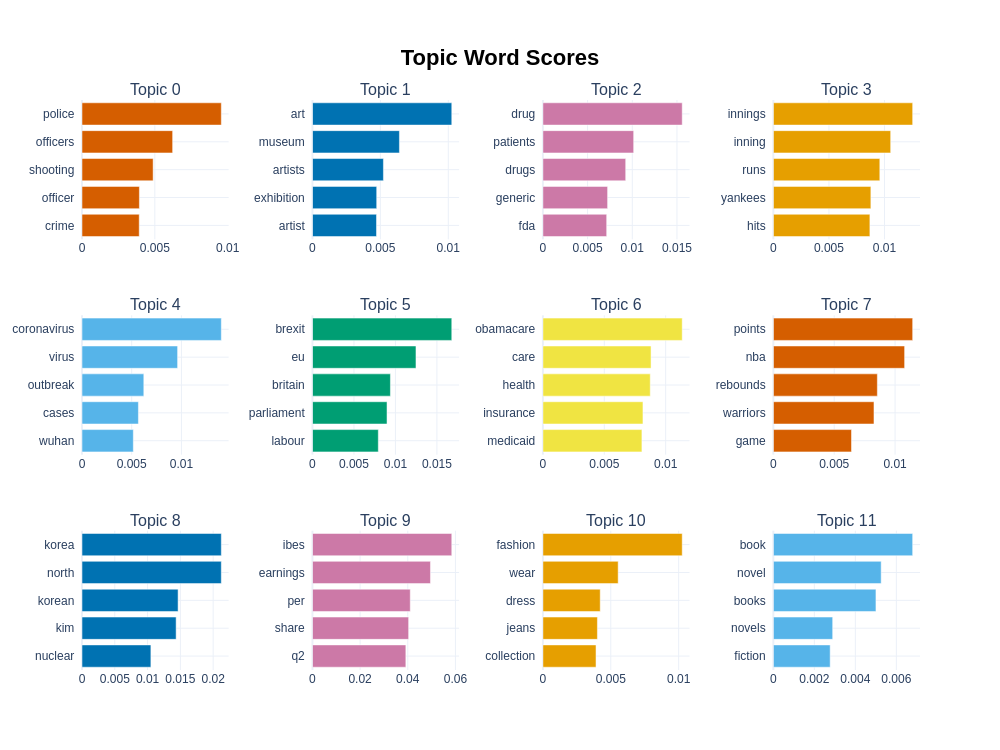

In [10]:
img_bytes = tp.to_image(format="png")
Image(img_bytes)